# Analyze Bexit

This is based on work by [Bob Belderbos](https://github.com/bbelderbos/brexit-pandas).

In [1]:
%matplotlib inline
import pandas as pd

## Preparation

Importing CSV data from [electoralcommission.org.uk](http://www.electoralcommission.org.uk/find-information-by-subject/elections-and-referendums/upcoming-elections-and-referendums/eu-referendum/electorate-and-count-information)

In [2]:
df = pd.read_csv("http://www.electoralcommission.org.uk/__data/assets/file/0014/212135/EU-referendum-result-data.csv")

In [3]:
df.head()

,id,Region_Code,Region,Area_Code,Area,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,...,Remain,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected
0,108,E12000006,East,E06000031,Peterborough,120892,87474,87469,72.35,87469,...,34176,53216,77,0,32,7,38,39.11,60.89,0.09
1,109,E12000006,East,E06000032,Luton,127612,84633,84636,66.31,84616,...,36708,47773,135,0,85,0,50,43.45,56.55,0.16
2,112,E12000006,East,E06000033,Southend-on-Sea,128856,93948,93939,72.90,93939,...,39348,54522,69,0,21,0,48,41.92,58.08,0.07
3,113,E12000006,East,E06000034,Thurrock,109897,79969,79954,72.75,79950,...,22151,57765,34,0,8,3,23,27.72,72.28,0.04
4,110,E12000006,East,E06000055,Bedford,119530,86136,86136,72.06,86135,...,41497,44569,69,0,26,1,42,48.22,51.78,0.08


## Check of some numbers

Let's see if we can match the data of the [Financial Times summary page](https://ig.ft.com/sites/elections/2016/uk/eu-referendum/index.html) ...

There it says for example: "The leave camp has won the day by 1,269,501 votes", does this match my data?

In [4]:
leave = df["Leave"].sum() 
remain = df["Remain"].sum()
print("{} - {} = {}".format(leave, remain, (leave - remain)))

17410742 - 16141241 = 1269501


Leave won with: 51,9% vs Remain 48,1%

In [5]:
leave / (remain + leave) *100

51.891841981441154

One more check: [electoralcommission.org.uk](http://www.electoralcommission.org.uk/find-information-by-subject/elections-and-referendums/upcoming-elections-and-referendums/eu-referendum/electorate-and-count-information) mentions: 

- Total Electorate: 46,500,001
- Turnout: 72.2%
- Rejected Ballots: 25,359

In [6]:
electorate = df['Electorate'].sum(); electorate

46500001

In [7]:
turnout = (leave + remain) / electorate * 100; turnout

72.154800598821495

In [8]:
rejected = df.Rejected_Ballots.sum(); rejected

25359

## Local areas most in favor of staying vs leaving

OK, now the fun part, plot analysis of areas followed by regions...

We are going to look at the area most in favor of exiting the Union: 

In [9]:
dfa = df.groupby("Area").sum()
dfa.head()
dfa["Perc_leave"] = dfa["Leave"] / (dfa["Remain"] + dfa["Leave"]) * 100
dfa["Perc_remain"] = dfa["Remain"] / (dfa["Remain"] + dfa["Leave"]) * 100

In [10]:
dfa.head(3)

,id,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,Valid_Votes,Remain,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected,Perc_leave,Perc_remain
Area,,,,,,,,,,,,,,,,,,,
Aberdeen City,148,154266,104809,104809,67.94,104809,104714,63985,40729,95,0,34,2,59,61.10,38.90,0.09,38.895468,61.104532
Aberdeenshire,149,196809,139014,139014,70.63,139014,138961,76445,62516,53,0,19,1,33,55.01,44.99,0.04,44.988162,55.011838
Adur,368,48755,37253,37251,76.40,37251,37229,16914,20315,22,0,8,0,14,45.43,54.57,0.06,54.567676,45.432324


In [11]:
top5_leave = dfa[["Perc_leave", "Perc_remain"]].sort_values(by="Perc_leave", ascending=False)[0:5]
top5_leave.head()

,Perc_leave,Perc_remain
Area,,
Boston,75.562426,24.437574
South Holland,73.586278,26.413722
Castle Point,72.699392,27.300608
Thurrock,72.282146,27.717854
Great Yarmouth,71.504947,28.495053


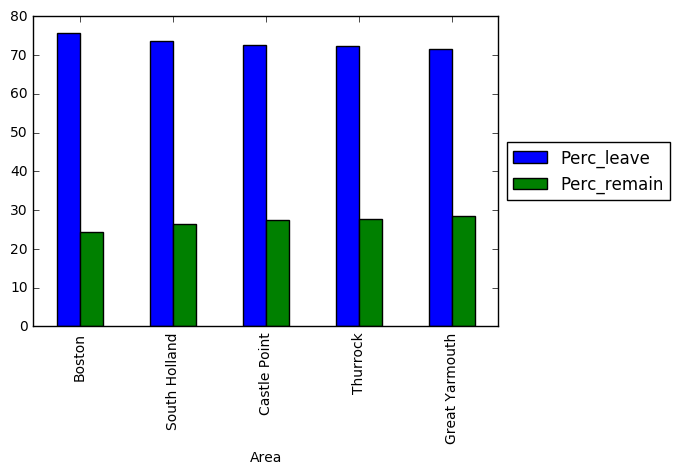

In [12]:
plt1 = top5_leave.plot(kind="bar")
plt1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Boston at the extreme. Let's see the other extreme: who mostly wanted to stay? We simply change some parametres:

In [13]:
top5_remain = dfa[["Perc_leave", "Perc_remain"]].sort_values(by="Perc_leave", ascending=False)[-5:]
top5_remain

,Perc_leave,Perc_remain
Area,,
City of London,24.710161,75.289839
Haringey,24.426998,75.573002
Hackney,21.519583,78.480417
Lambeth,21.377639,78.622361
Gibraltar,4.085381,95.914619


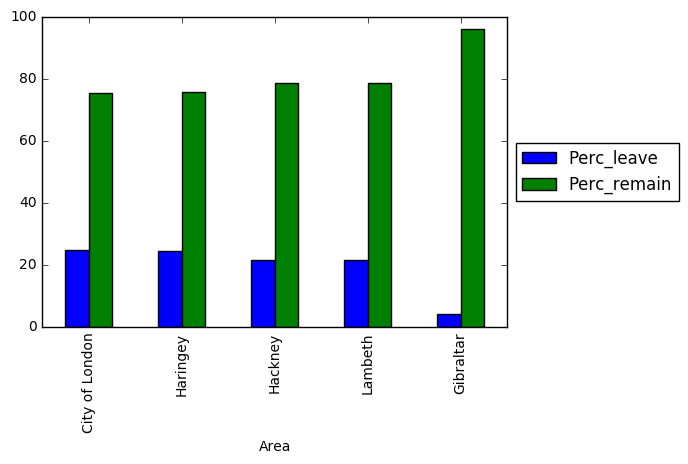

In [14]:
plt2 = top5_remain.plot(kind="bar")
plt2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Gibraltar shows a clear spike!

## Regions

Now we look at what regions want to remain / leave: 

In [15]:
dfr = df.groupby("Region").sum(); dfr

,id,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,Valid_Votes,Remain,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected
Region,,,,,,,,,,,,,,,,,
East,11428,4398796,3331637,3331459,3559.86,3331312,3328983,1448616,1880367,2329,17,815,72,1425,2022.78,2677.22,3.27
East Midlands,10451,3384299,2510653,2510561,3018.09,2510496,2508515,1033036,1475479,1981,7,694,73,1207,1617.02,2382.98,2.85
London,561,5424768,3781355,3781234,2303.97,3781204,3776751,2263519,1513232,4453,26,1788,143,2496,2009.98,1290.02,3.94
North East,786,1934341,1341474,1341387,829.57,1341387,1340698,562595,778103,689,8,185,30,466,486.25,713.75,0.62
North West,5583,5241568,3668740,3668629,2758.82,3668627,3665945,1699020,1966925,2682,44,851,110,1677,1719.31,2180.69,2.87
Northern Ireland,381,1260955,790647,790523,62.69,790523,790149,440707,349442,374,18,148,1,207,55.78,44.22,0.05
Scotland,5232,3987112,2681265,2681179,2195.87,2681179,2679513,1661191,1018322,1666,6,553,38,1069,1947.62,1252.38,2.12
South East,17317,6465404,4963338,4963182,5162.38,4963110,4959683,2391718,2567965,3427,13,1197,148,2069,3204.61,3495.39,4.64
South West,7622,4138134,3175204,3175003,2945.16,3174909,3172730,1503019,1669711,2179,5,735,65,1374,1809.59,1990.41,2.51


In [16]:
dfr["Perc_leave"] = dfr["Leave"] / (dfr["Remain"] + dfr["Leave"]) * 100
dfr["Perc_remain"] = dfr["Remain"] / (dfr["Remain"] + dfr["Leave"]) * 100

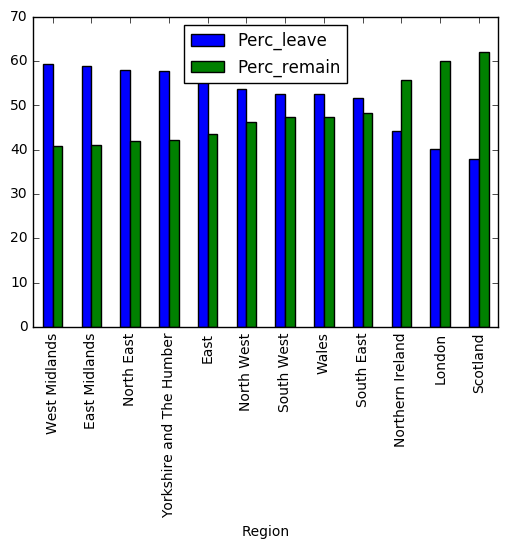

In [17]:
dfr[["Perc_leave", "Perc_remain"]].sort_values(by="Perc_leave", ascending=False).plot(kind="bar")

We can see that Scotland, London and Ireland wanted to stay, The Midlands want to leave. 

## Doing relations with demographic data

We can relate the brexit voting data per area to various demographic data found at [2011 Census, Key Statistics for Local Authorities in England and Wales](http://webarchive.nationalarchives.gov.uk/20160105160709/http://www.ons.gov.uk/ons/publications/re-reference-tables.html?edition=tcm%3A77-286262). Let's check if there is a relation between the voting and median age, unemployment, higher education and born outside UK.

Define the census tables we need:

In [18]:
census_data = {
     "age" : "http://webarchive.nationalarchives.gov.uk/20160105160709/http://www.ons.gov.uk/ons/rel/census/2011-census/key-statistics-for-local-authorities-in-england-and-wales/rft-table-ks102ew.xls",
     "unemployment" : "http://webarchive.nationalarchives.gov.uk/20160105160709/http://www.ons.gov.uk/ons/rel/census/2011-census/key-statistics-for-local-authorities-in-england-and-wales/rft-table-ks601ew.xls",
     "education" : "http://webarchive.nationalarchives.gov.uk/20160105160709/http://www.ons.gov.uk/ons/rel/census/2011-census/key-statistics-for-local-authorities-in-england-and-wales/rft-table-ks501ew.xls",
     "outside_uk" : "http://webarchive.nationalarchives.gov.uk/20160105160709/http://www.ons.gov.uk/ons/rel/census/2011-census/key-statistics-for-local-authorities-in-england-and-wales/rft-table-qs203ew.xls",
}

Load the census data for age, unemployment rate and people born outside of UK:

In [19]:
age = pd.read_excel(io=census_data["age"], sheetname="KS102EW_Numbers", header=10, parse_cols=("A,W"), skiprows=[11,12,13])
age.head()

,Area code,Median age
0,K04000001,39.0
1,NaN,NaN
2,E92000001,39.0
3,NaN,NaN
4,E12000001,41.0


In [20]:
age.dropna(how='all', inplace=True)
age.rename(index=str, inplace=True, columns={"Median age": "median_age", }) 
age = age[["Area code", "median_age"]]
age.head()

,Area code,median_age
0,K04000001,39.0
2,E92000001,39.0
4,E12000001,41.0
6,E06000047,42.0
7,E06000005,41.0


In [21]:
# level 3 and 4+ = cols J and K 
education = pd.read_excel(io=census_data["education"], sheetname="KS501EW_Numbers", header=10, parse_cols=("A,E,J,K"), skiprows=[11,12,13])
education.dropna(how='all', inplace=True)
education["perc_high_education"] = (education[education.columns[2]] + education[education.columns[3]]) / education[education.columns[1]]
education = education[["Area code", "perc_high_education"]]
education.head(2)

,Area code,perc_high_education
1,K04000001,0.395661
3,E92000001,0.397282


In [22]:
unemployment = pd.read_excel(io=census_data["unemployment"], sheetname="KS601EW_Numbers", header=10, parse_cols=("A,E,I"), skiprows=[11,12,13])
unemployment.dropna(how='all', inplace=True)
unemployment["perc_unemployed"] = unemployment[unemployment.columns[2]] / unemployment[unemployment.columns[1]]
unemployment = unemployment[["Area code", "perc_unemployed"]]
unemployment.head(2)

,Area code,perc_unemployed
0,K04000001,0.043756
2,E92000001,0.043796


In [23]:
outside_uk = pd.read_excel(io=census_data["outside_uk"], sheetname="QS203EW_Numbers", header=10, parse_cols=("A,E,G"), skiprows=[11,12,13])
outside_uk.dropna(how='all', inplace=True)
outside_uk.columns[2]
# all birth (col E) - UK birth (col G) = outside birth
outside_uk["perc_born_outside_uk"] = (outside_uk[outside_uk.columns[1]] - outside_uk[outside_uk.columns[2]]) / outside_uk[outside_uk.columns[1]]
outside_uk = outside_uk[["Area code", "perc_born_outside_uk"]]
outside_uk.head(2)

,Area code,perc_born_outside_uk
0,K04000001,0.133837
2,E92000001,0.138404


In [24]:
df.head()

,id,Region_Code,Region,Area_Code,Area,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,...,Remain,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected
0,108,E12000006,East,E06000031,Peterborough,120892,87474,87469,72.35,87469,...,34176,53216,77,0,32,7,38,39.11,60.89,0.09
1,109,E12000006,East,E06000032,Luton,127612,84633,84636,66.31,84616,...,36708,47773,135,0,85,0,50,43.45,56.55,0.16
2,112,E12000006,East,E06000033,Southend-on-Sea,128856,93948,93939,72.90,93939,...,39348,54522,69,0,21,0,48,41.92,58.08,0.07
3,113,E12000006,East,E06000034,Thurrock,109897,79969,79954,72.75,79950,...,22151,57765,34,0,8,3,23,27.72,72.28,0.04
4,110,E12000006,East,E06000055,Bedford,119530,86136,86136,72.06,86135,...,41497,44569,69,0,26,1,42,48.22,51.78,0.08


In [25]:
votes = df.loc[:,["Area_Code"]]
votes["votes"] = df["Remain"] - df["Leave"]
votes = votes.rename(index=str, columns={"Area_Code": "Area code", })
votes.head()

,Area code,votes
0,E06000031,-19040
1,E06000032,-11065
2,E06000033,-15174
3,E06000034,-35614
4,E06000055,-3072


In [26]:
data = votes.merge(age, on='Area code').merge(unemployment, on='Area code').merge(education, on='Area code').merge(outside_uk, on='Area code')
data.head()

,Area code,votes,median_age,perc_unemployed,perc_high_education,perc_born_outside_uk
0,E06000031,-19040,35.0,0.050568,0.310281,0.206349
1,E06000032,-11065,32.0,0.057414,0.333318,0.309408
2,E06000033,-15174,40.0,0.049669,0.332425,0.098596
3,E06000034,-35614,36.0,0.054239,0.283631,0.119692
4,E06000055,-3072,39.0,0.044478,0.399608,0.176049


## Exercise

Use a scatter plot to show the relations between the votes and the age, unemployment rate, high education rate and people born outside UK.

**Hint:** Use the `scatter()` function in matplotlib.  Also, make a plotting function so that it can be reused for producing the different plots.